In [140]:
import pandas as pd 
import numpy as np

<h1>Loading Dataset</h1>

In [141]:
movies=pd.read_csv('movies_metadata.csv')
credits=pd.read_csv('credits.csv')
keywords=pd.read_csv('keywords.csv')
ratings=pd.read_csv('ratings_small.csv')

C:\Users\usman\AppData\Local\Temp\ipykernel_1676\2249312021.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies=pd.read_csv('movies_metadata.csv')


In [142]:
movies.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [143]:
credits.head(1)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862


In [144]:
keywords.head(1)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [145]:
ratings.head(1)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144


<h1>Merging Dataset</h1>

In [146]:
# Fix 'id' column types for proper merging
# Remove non-numeric IDs and convert to integers
movies = movies[movies['id'].apply(lambda x: str(x).isdigit())].copy()
movies['id'] = movies['id'].astype(int)
credits['id'] = credits['id'].astype(int)
keywords['id'] = keywords['id'].astype(int)

# Merge movies with credits
movies_merged = movies.merge(credits, on='id')

# Merge the result with keywords
final_merged = movies_merged.merge(keywords, on='id')

# final_merged now contains combined information from all three datasets
final_merged.head()
final_merged.head(1)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [147]:
# CONTENT BASED
#1.genres
#2.id
#3.overview
#4.title
#5.cast
#6.crew
#7.keywords

<h1>Selecting Column</h1>

In [148]:
final_merged=final_merged[['id','title','overview','genres','keywords','cast','crew']]

In [149]:
final_merged.head(1)

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."


<h1>Preprocessing</h1>

In [150]:
final_merged.dropna(inplace=True)

In [151]:
final_merged.isnull().sum()

id          0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [152]:
# remove duplicated data
final_merged = final_merged.drop_duplicates()

In [153]:
# check duplicated data
final_merged.duplicated().sum()

0

In [154]:
final_merged.iloc[0].genres

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [155]:
import ast
ast.literal_eval

<function ast.literal_eval(node_or_string)>

In [156]:
import ast

def convert(obj):
    try:
        parsed = ast.literal_eval(obj)
        return [item['name'] for item in parsed if 'name' in item]
    except (ValueError, SyntaxError):
        return []  


In [157]:
final_merged['genres']=final_merged['genres'].apply(convert)

In [158]:
final_merged.head(1)

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."


In [159]:
final_merged['keywords']=final_merged['keywords'].apply(convert)

In [160]:
final_merged.head(1)

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."


In [161]:
final_merged.iloc[1]

id                                                       8844
title                                                 Jumanji
overview    When siblings Judy and Peter discover an encha...
genres                           [Adventure, Fantasy, Family]
keywords    [board game, disappearance, based on children'...
cast        [{'cast_id': 1, 'character': 'Alan Parrish', '...
crew        [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...
Name: 1, dtype: object

In [162]:
final_merged.head(1)

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."


In [163]:
import ast

def convert3(obj):
    L = []
    counter = 0  # Initialize counter
    try:
        for i in ast.literal_eval(obj):
            if counter != 3:
                L.append(i['name'])
                counter += 1
            else:
                break
    except (ValueError, SyntaxError):
        pass  # In case the string is not valid
    return L


In [164]:
final_merged['cast']=final_merged['cast'].apply(convert)

In [165]:
final_merged.head(1)

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."


In [166]:
import ast

def fetch_director(obj):
    try:
        for i in ast.literal_eval(obj):
            if i.get('job') == 'Director':
                return [i.get('name')]
    except (ValueError, SyntaxError):
        pass
    return []


In [167]:
final_merged['crew']=final_merged['crew'].apply(fetch_director)

In [168]:
final_merged.head(1)

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter]


In [169]:
final_merged['overview'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [170]:
final_merged['overview'] = final_merged['overview'].apply(lambda x: x.split() if isinstance(x, str) else x)


In [171]:
final_merged.head(1)

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter]


<h1>Transformation</h1>

In [172]:
final_merged.head(5)

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter]
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Adventure, Fantasy, Family]","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston]
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Romance, Comedy]","[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch]
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[Comedy, Drama, Romance]","[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker]
4,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...",[Comedy],"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer]


In [173]:
def remove_spaces(lst):
    return [i.replace(" ", "") for i in lst if isinstance(i, str)]
    s

final_merged['genres'] = final_merged['genres'].apply(remove_spaces)
final_merged['keywords'] = final_merged['keywords'].apply(remove_spaces)
final_merged['cast'] = final_merged['cast'].apply(remove_spaces)
final_merged['crew'] = final_merged['crew'].apply(remove_spaces)


In [174]:
final_merged.head(1)

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...",[JohnLasseter]


In [175]:
# new column(overview+genres+keywords+cast+crew=tags)

final_merged['tags']=final_merged['overview'] + final_merged['genres'] + final_merged['keywords'] + final_merged['cast'] + final_merged['crew']

In [176]:
final_merged.head()

,id,title,overview,genres,keywords,cast,crew,tags
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...",[JohnLasseter],"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Adventure, Fantasy, Family]","[boardgame, disappearance, basedonchildren'sbo...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston],"[When, siblings, Judy, and, Peter, discover, a..."
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Romance, Comedy]","[fishing, bestfriend, duringcreditsstinger, ol...","[WalterMatthau, JackLemmon, Ann-Margret, Sophi...",[HowardDeutch],"[A, family, wedding, reignites, the, ancient, ..."
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[Comedy, Drama, Romance]","[basedonnovel, interracialrelationship, single...","[WhitneyHouston, AngelaBassett, LorettaDevine,...",[ForestWhitaker],"[Cheated, on,, mistreated, and, stepped, on,, ..."
4,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...",[Comedy],"[baby, midlifecrisis, confidence, aging, daugh...","[SteveMartin, DianeKeaton, MartinShort, Kimber...",[CharlesShyer],"[Just, when, George, Banks, has, recovered, fr..."


In [178]:
final_merged=final_merged[['id','title','tags']]

In [180]:
final_merged.head()

,id,title,tags
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a..."
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ..."
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ..."
4,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr..."


In [181]:
final_merged['tags']=final_merged['tags'].apply(lambda x:" ".join(x))

C:\Users\usman\AppData\Local\Temp\ipykernel_1676\2947124829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged['tags']=final_merged['tags'].apply(lambda x:" ".join(x))


In [182]:
final_merged.head()

,id,title,tags
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...


<h1>Collaborative filtering</h1>

In [6]:
import pandas as pd
import numpy as np

In [7]:
movies=pd.read_csv('movies_metadata.csv')
ratings=pd.read_csv('ratings_small.csv')
links_small=pd.read_csv('links_small.csv')

C:\Users\usman\AppData\Local\Temp\ipykernel_4448\3004767992.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies=pd.read_csv('movies_metadata.csv')


In [8]:
movies.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [9]:
ratings.head(1)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144


In [10]:
links_small.head(1)

,movieId,imdbId,tmdbId
0,1,114709,862.0


In [11]:

movies['imdb_id'] = movies['imdb_id'].astype(str).str.extract(r'(\d+)', expand=False)


In [12]:
ratings = pd.merge(ratings, links_small, on='movieId', how='left')


In [13]:
ratings['imdbId'] = ratings['imdbId'].astype(str)
movies['imdb_id'] = movies['imdb_id'].astype(str)

# Merge
final_merged = pd.merge(ratings, movies, left_on='imdbId', right_on='imdb_id', how='left')


In [14]:
final_merged.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId,adult,belongs_to_collection,budget,genres,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,31,2.5,1260759144,112792,9909.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1029,3.0,1260759179,33563,11360.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1061,3.0,1260759182,117665,819.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1129,2.0,1260759185,82340,1103.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1172,4.0,1260759205,95765,11216.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#collaborative filtering
# userId
# moviesId
# rating
# timestamp
#title
#genres


In [16]:
print(final_merged.columns)


Index(['userId', 'movieId', 'rating', 'timestamp', 'imdbId', 'tmdbId', 'adult',
       'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [17]:
final_merged=final_merged[['userId','movieId','rating','timestamp','title']]

In [18]:
final_merged.head()

,userId,movieId,rating,timestamp,title
0,1,31,2.5,1260759144,NaN
1,1,1029,3.0,1260759179,NaN
2,1,1061,3.0,1260759182,NaN
3,1,1129,2.0,1260759185,NaN
4,1,1172,4.0,1260759205,NaN


In [19]:
final_merged=ratings.pivot(index='movieId',columns='userId',values='rating')

In [20]:
final_merged.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
final_merged.fillna(0,inplace=True)

In [22]:
final_merged.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Removing noise from dataset

no_user_voted=ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted=ratings.groupby('userId')['rating'].agg('count')

In [24]:
no_user_voted

movieId
1         247
2         107
3          59
4          13
5          56
         ... 
161944      1
162376      1
162542      1
162672      1
163949      1
Name: rating, Length: 9066, dtype: int64

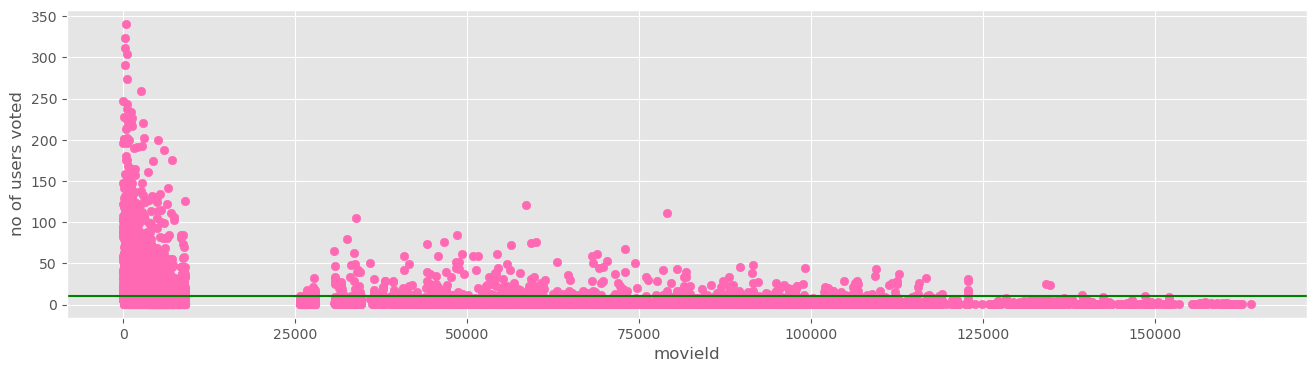

In [25]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig,axes=plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='hotpink')
plt.axhline(y=10,color='green')
plt.xlabel('movieId')
plt.ylabel('no of users voted')
plt.show()           
           

In [26]:
final_merged=final_merged.loc[no_user_voted[no_user_voted > 10].index,:]

In [27]:
final_merged

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.5,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


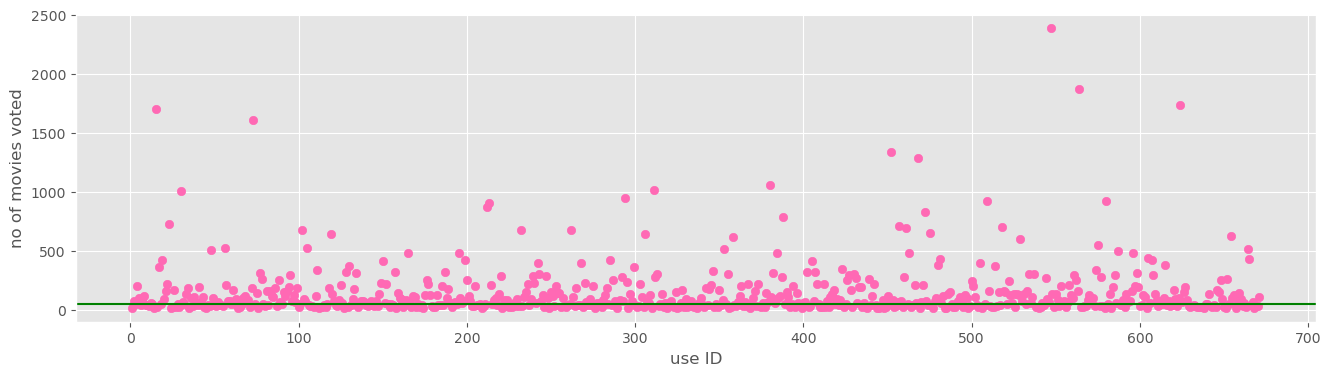

In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig,axes=plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='hotpink')
plt.axhline(y=50,color='green')
plt.xlabel('use ID')
plt.ylabel('no of movies voted')
plt.show()           
           

In [29]:
final_merged=final_merged.loc[: , no_movies_voted[no_movies_voted > 50].index]

In [30]:
final_merged.shape

(2083, 421)

In [31]:
final_merged.head()

userId,2,3,4,5,7,8,12,13,15,17,...,655,656,658,659,660,662,664,665,667,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,2.5,0.0,3.5,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0
3,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [32]:
2083*421

876943